**Analisis Masalah
1. xxx
2. xxx
3. xxx

# Data Cleaning

In [202]:
# import module yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime
import scipy.stats as stats

**Import data Covid-19 DKI Jakarta**

In [203]:
df_covid = pd.read_csv('/content/Daily Update Data Agregat Covid-19 Jakarta - Data Jakarta.csv')
df_covid

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,01/03/2020,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,02/03/2020,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,03/03/2020,NaN,NaN,1,0,0,2,3,3,2,0,NaN,NaN,NaN
3,04/03/2020,NaN,NaN,1,0,0,2,3,0,2,0,NaN,NaN,NaN
4,05/03/2020,NaN,NaN,3,0,0,4,7,4,4,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,26/06/2023,NaN,NaN,16115,1551828,124,67,1568134,10,191,25,0.0,2.0,189.0
1213,27/06/2023,NaN,NaN,16115,1551845,126,67,1568153,19,193,17,0.0,10.0,183.0
1214,28/06/2023,NaN,NaN,16115,1551857,129,63,1568164,11,192,12,0.0,10.0,182.0
1215,29/06/2023,NaN,NaN,16115,1551896,117,44,1568172,8,161,39,0.0,8.0,153.0


In [204]:
#Mengubah jenis data variabel dan drop kolom yang tidak akan digunakan
df_covid['Tanggal'] = pd.to_datetime(df_covid['Tanggal'])

df_covid['tanggal'] = df_covid['Tanggal'].dt.strftime('%d-%m-%Y')
df_covid['tanggal'] = pd.to_datetime(df_covid['tanggal'])

df_covid.drop(df_covid.columns[[0,1,2,3,11,12,13]], axis = 1, inplace = True)
df_covid

<ipython-input-204-3f4e104dd155>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_covid['tanggal'] = pd.to_datetime(df_covid['tanggal'])


,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,tanggal
0,0,0,0,0,0,0,0,2020-03-01
1,0,0,0,0,0,0,0,2020-03-02
2,0,0,2,3,3,2,0,2020-03-03
3,0,0,2,3,0,2,0,2020-03-04
4,0,0,4,7,4,4,0,2020-03-05
...,...,...,...,...,...,...,...,...
1212,1551828,124,67,1568134,10,191,25,2023-06-26
1213,1551845,126,67,1568153,19,193,17,2023-06-27
1214,1551857,129,63,1568164,11,192,12,2023-06-28
1215,1551896,117,44,1568172,8,161,39,2023-06-29


**Import data vaksin Covid-19 DKI Jakarta**

In [205]:
df1 = pd.read_csv('/content/data-jumlah-vaksinasi-lansia-menurut-kelurahan-di-provinsi-dki-jakarta-bulan-juli-tahun-2021.csv')
df2 = pd.read_csv('/content/data-jumlah-vaksinasi-lansia-menurut-kelurahan-di-provinsi-dki-jakarta-bulan-agustus-tahun-2021.csv')
df3 = pd.read_csv('/content/data-jumlah-vaksinasi-lansia-menurut-kelurahan-di-provinsi-dki-jakarta-bulan-september-tahun-2021.csv')
df4 = pd.read_csv('/content/data-jumlah-vaksinasi-lansia-menurut-kelurahan-di-provinsi-dki-jakarta-bulan-oktober-tahun-2021.csv')

df_merged1 = df1.merge(df2, how ='outer')
df_merged1 = df_merged1.merge(df3, how = 'outer')
df_merged1 = df_merged1.merge(df4, how = 'outer')

dosis2_lansia = df_merged1[df_merged1['dosis'] == 'Dosis 2']

csv_name1 = 'VaksinJakarta_Lansia_Dosis2.csv' #untuk save hasil filter ke bentuk .csv
dosis2_lansia.to_csv(csv_name1, index = False)

df5 = pd.read_csv('/content/data-jumlah-vaksinasi-remaja-menurut-kelurahan-di-provinsi-dki-jakarta-bulan-juli-tahun-2021.csv')
df6 = pd.read_csv('/content/data-jumlah-vaksinasi-remaja-menurut-kelurahan-di-provinsi-dki-jakarta-bulan-agustus-tahun-2021.csv')
df7 = pd.read_csv('/content/data-jumlah-vaksinasi-remaja-menurut-kelurahan-di-provinsi-dki-jakarta-bulan-september-tahun-2021.csv')
df8 = pd.read_csv('/content/data-jumlah-vaksinasi-remaja-menurut-kelurahan-di-provinsi-dki-jakarta-bulan-oktober-tahun-2021.csv')

df_merged2 = df5.merge(df6, how = 'outer')
df_merged2 = df_merged2.merge(df7, how = 'outer')
df_merged2 = df_merged2.merge(df8, how = 'outer')

dosis2_remaja = df_merged2[df_merged2['dosis'] == 'Dosis 2']

csv_name2 = 'VaksinJakarta_Remaja_Dosis2.csv'
dosis2_remaja.to_csv(csv_name2, index = False) #untuk save hasil filter ke bentuk .csv

df_vaksin = dosis2_lansia.merge(dosis2_remaja, how = 'outer')
df_vaksin

,tanggal,kode_kelurahan,wilayah_kota,kecamatan,kelurahan,penerima_vaksinasi,dosis,jumlah_vaksin,kode kelurahan,wilayah kota,penerima_vaksin
0,2021-07-01,3.171071e+09,JAKARTA PUSAT,TANAH ABANG,BENDUNGAN HILIR,LANSIA,Dosis 2,1433.0,NaN,NaN,NaN
1,2021-07-01,3.171041e+09,JAKARTA PUSAT,SENEN,BUNGUR,LANSIA,Dosis 2,1134.0,NaN,NaN,NaN
2,2021-07-01,3.171031e+09,JAKARTA PUSAT,KEMAYORAN,CEMPAKA BARU,LANSIA,Dosis 2,1304.0,NaN,NaN,NaN
3,2021-07-01,3.171051e+09,JAKARTA PUSAT,CEMPAKA PUTIH,CEMPAKA PUTIH BARAT,LANSIA,Dosis 2,1698.0,NaN,NaN,NaN
4,2021-07-01,3.171051e+09,JAKARTA PUSAT,CEMPAKA PUTIH,CEMPAKA PUTIH TIMUR,LANSIA,Dosis 2,1726.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
58468,2021-10-31,NaN,NaN,MATRAMAN,UTAN KAYU SELATAN,REMAJA,Dosis 2,2526.0,3.175011e+09,JAKARTA TIMUR,NaN
58469,2021-10-31,NaN,NaN,MATRAMAN,UTAN KAYU UTARA,REMAJA,Dosis 2,2043.0,3.175011e+09,JAKARTA TIMUR,NaN
58470,2021-10-31,NaN,NaN,KEMAYORAN,UTAN PANJANG,REMAJA,Dosis 2,2385.0,3.171031e+09,JAKARTA PUSAT,NaN
58471,2021-10-31,NaN,NaN,TANJUNG PRIOK,WARAKAS,REMAJA,Dosis 2,3208.0,3.172021e+09,JAKARTA UTARA,NaN


In [206]:
#drop kolom yang tidak akan digunakan dan mengelompokkan data pada variable jumlah_vaksin
df_vaksin.drop(df_vaksin.columns[[1,2,3,4,5,8,9,10]], axis = 1, inplace = True)
df_vaksin['tanggal'] = pd.to_datetime(df_vaksin['tanggal'])

df_vaksin['Tanggal'] = df_vaksin['tanggal'].dt.strftime('%Y-%m-%d')
df_vaksin['Tanggal'] = pd.to_datetime(df_vaksin['Tanggal'])

df_vaksin = df_vaksin.groupby('Tanggal').sum()
df_vaksin = df_vaksin.reset_index(level='Tanggal')
df_vaksin

<ipython-input-206-e2767b480296>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_vaksin = df_vaksin.groupby('Tanggal').sum()


,Tanggal,jumlah_vaksin
0,2021-07-01,449073.0
1,2021-07-02,449200.0
2,2021-07-03,449281.0
3,2021-07-04,449352.0
4,2021-07-05,449357.0
...,...,...
114,2021-10-27,1312179.0
115,2021-10-28,1231133.0
116,2021-10-29,1236778.0
117,2021-10-30,1240168.0


# Exploratory Data Analysis










**Pre-processing**

In [71]:
#untuk melihat apakah terdapat missing value
df_covid.isnull().all()

Sembuh             False
Self Isolation     False
Masih Perawatan    False
Total Pasien       False
Positif Harian     False
Positif Aktif      False
Sembuh Harian      False
tanggal            False
dtype: bool

In [72]:
#untuk melihat apakah terdapat missing value
df_vaksin.isnull().all()

Tanggal          False
jumlah_vaksin    False
dtype: bool

**Statistika Deskriptif**

* Data Covid-19 DKI Jakarta

In [ ]:
df_covid.describe()

,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian
count,1217.000000,1.217000e+03,1217.000000,1217.000000,1.217000e+03,1217.000000,1217.000000,1217.000000
mean,10072.846343,7.878787e+05,8337.393591,2549.302383,8.088383e+05,1288.666393,10886.712408,1275.285949
std,6118.361376,5.759436e+05,13253.205670,4203.942467,5.808345e+05,2187.176647,16950.004382,2364.124603
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-162.000000
25%,3266.000000,1.629110e+05,1173.000000,287.000000,1.817130e+05,128.000000,1593.000000,121.000000
50%,13561.000000,8.469420e+05,4142.000000,1081.000000,8.614270e+05,600.000000,6340.000000,584.000000
75%,15502.000000,1.363254e+06,9078.000000,3067.000000,1.393909e+06,1403.000000,12440.000000,1310.000000
max,16115.000000,1.551920e+06,88295.000000,30418.000000,1.568183e+06,15825.000000,113138.000000,20570.000000


In [ ]:
df_covid.loc[df_covid['Positif Harian'] == 15825]

,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,tanggal
707,13794,899957,52594,14625,980970,15825,67219,8386,2022-02-06


In [ ]:
df_covid.loc[df_covid['Positif Aktif'] == 113138]

,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,tanggal
502,9845,604033,88295,24843,727016,12415,113138,8451,2021-07-16


<Axes: xlabel='Positif Harian'>

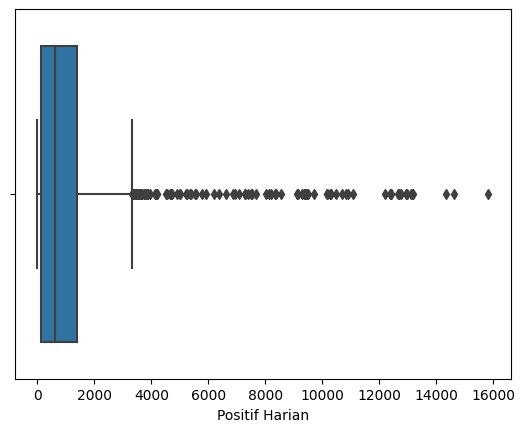

In [ ]:
sns.boxplot(x = df_covid['Positif Harian'])

In [ ]:
Q1 = df_covid['Positif Harian'].quantile(0.25)
Q3 = df_covid['Positif Harian'].quantile(0.75)
IQR = Q3 - Q1
outliers_=(df_covid['Positif Harian'] > Q3  + 1.5*IQR) # outliers atas
outlier = df_covid.loc[outliers_]
outlier[['tanggal','Positif Harian']]

,tanggal,Positif Harian
318,2021-01-13,3476
321,2021-01-16,3536
322,2021-01-17,3395
325,2021-01-20,3786
327,2021-01-22,3792
...,...,...
737,2022-03-08,3569
738,2022-03-09,3872
739,2022-03-10,3546
990,2022-11-16,3668


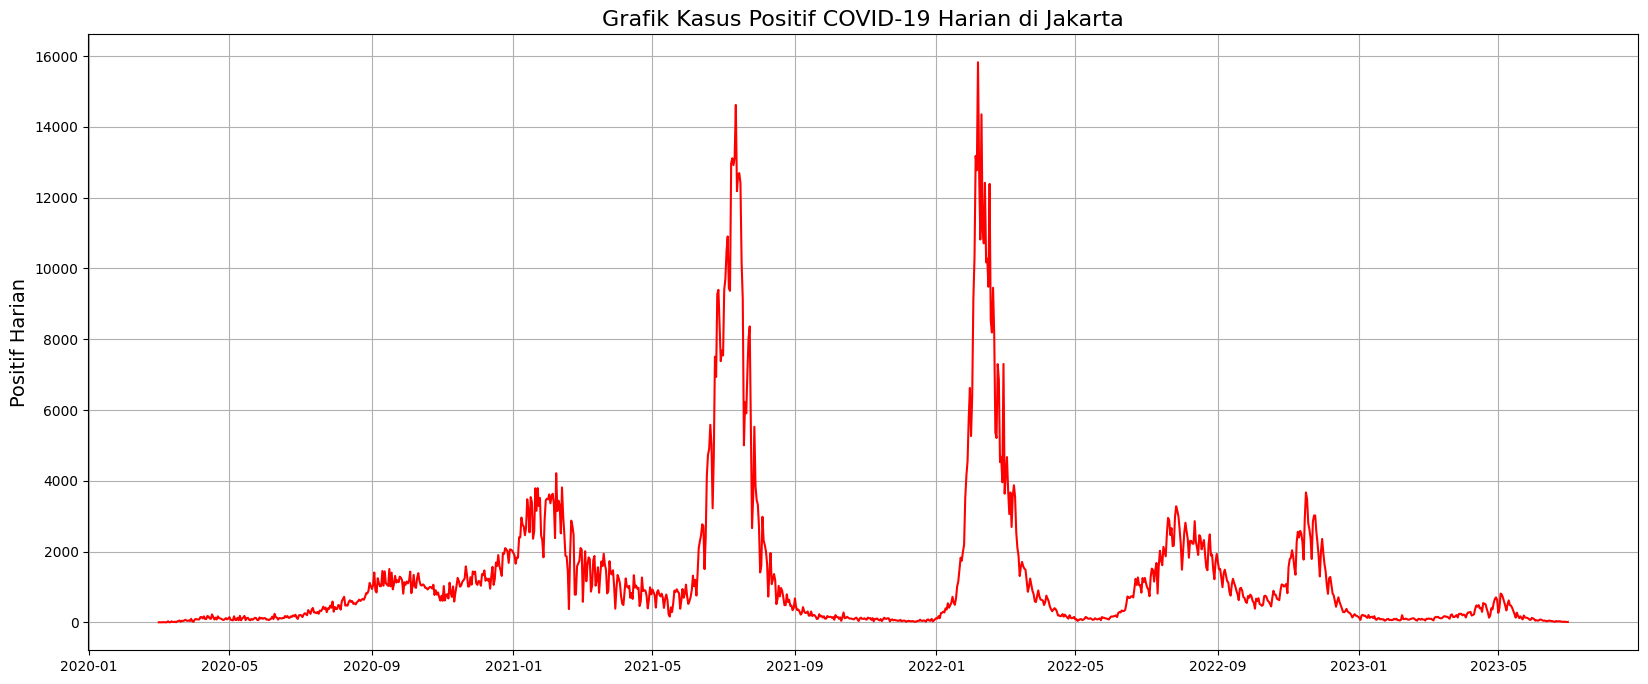

In [78]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(20, 8))
x.plot(df_covid['tanggal'], df_covid['Positif Harian'], 'r')
plt.title('Grafik Kasus Positif COVID-19 Harian di Jakarta', fontsize=16)
plt.ylabel('Positif Harian', fontsize=14)
plt.grid(True)
plt.show()

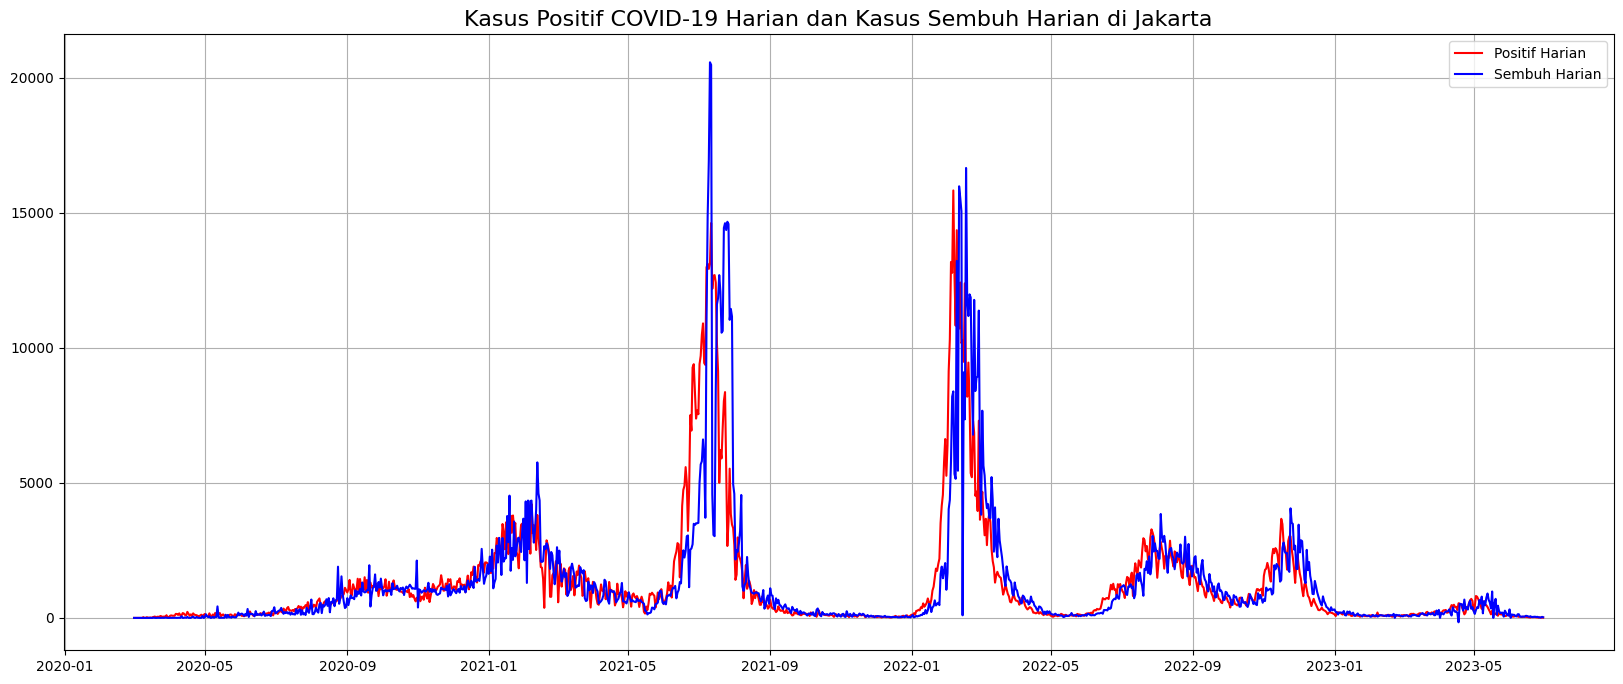

In [ ]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(20,8))
x.plot(df_covid['tanggal'], df_covid['Positif Harian'], 'r',label='Positif Harian')
x.plot(df_covid['tanggal'], df_covid['Sembuh Harian'], 'b',label='Sembuh Harian')
plt.title('Kasus Positif COVID-19 Harian dan Kasus Sembuh Harian di Jakarta', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# penurunan kasus positif harian
df_covid['Sembuh'] = df_covid['Sembuh Harian'].diff()
df_covid['Sembuh'].to_frame().describe()

,Sembuh
count,1216.000000
mean,0.019737
std,1093.301287
min,-15901.000000
25%,-90.000000
50%,-3.000000
75%,75.000000
max,10531.000000


In [ ]:
diffMax = df_covid.loc[df_covid['Sembuh'] == 10531]
diffMax[['tanggal','Positif Harian','Sembuh']]

,tanggal,Positif Harian,Sembuh
712,2022-02-11,10707,10531.0


paling banyak sembuh ada di

**Visualisasi Data Jumlah Vaksin dan Data Positif Harian Serta Sembuh Harian Covid-19 Jakarta Tahun 2021**

In [207]:
#Mengambil sample data Covid-19 Jakarta tahun 2021 pada bulan Juli hingga Oktober
df_covid = df_covid.drop([505,540,545,559])#menghapus beberapa baris untuk menyamakan jumlah entri pada data vaksin
df_covid_2021 = df_covid[(df_covid['tanggal'] <= '2021-10-31') & (df_covid['tanggal'] >= '2021-07-01')]
df_covid_2021.reset_index(inplace=True)
df_covid_2021

,index,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,tanggal
0,487,468461,49836,24184,551009,7541,74020,3518,2021-07-01
1,488,473467,53014,25380,560408,9399,78394,5006,2021-07-02
2,489,479150,54941,27442,570110,9702,82383,5683,2021-07-03
3,490,484949,59307,27687,580595,10485,86994,5799,2021-07-04
4,491,491556,62873,28290,591498,10903,91163,6607,2021-07-05
...,...,...,...,...,...,...,...,...,...
114,605,846667,618,260,861104,105,878,142,2021-10-27
115,606,846749,670,256,861235,131,926,82,2021-10-28
116,607,846799,713,259,861331,96,972,50,2021-10-29
117,608,846942,660,264,861427,96,924,143,2021-10-30


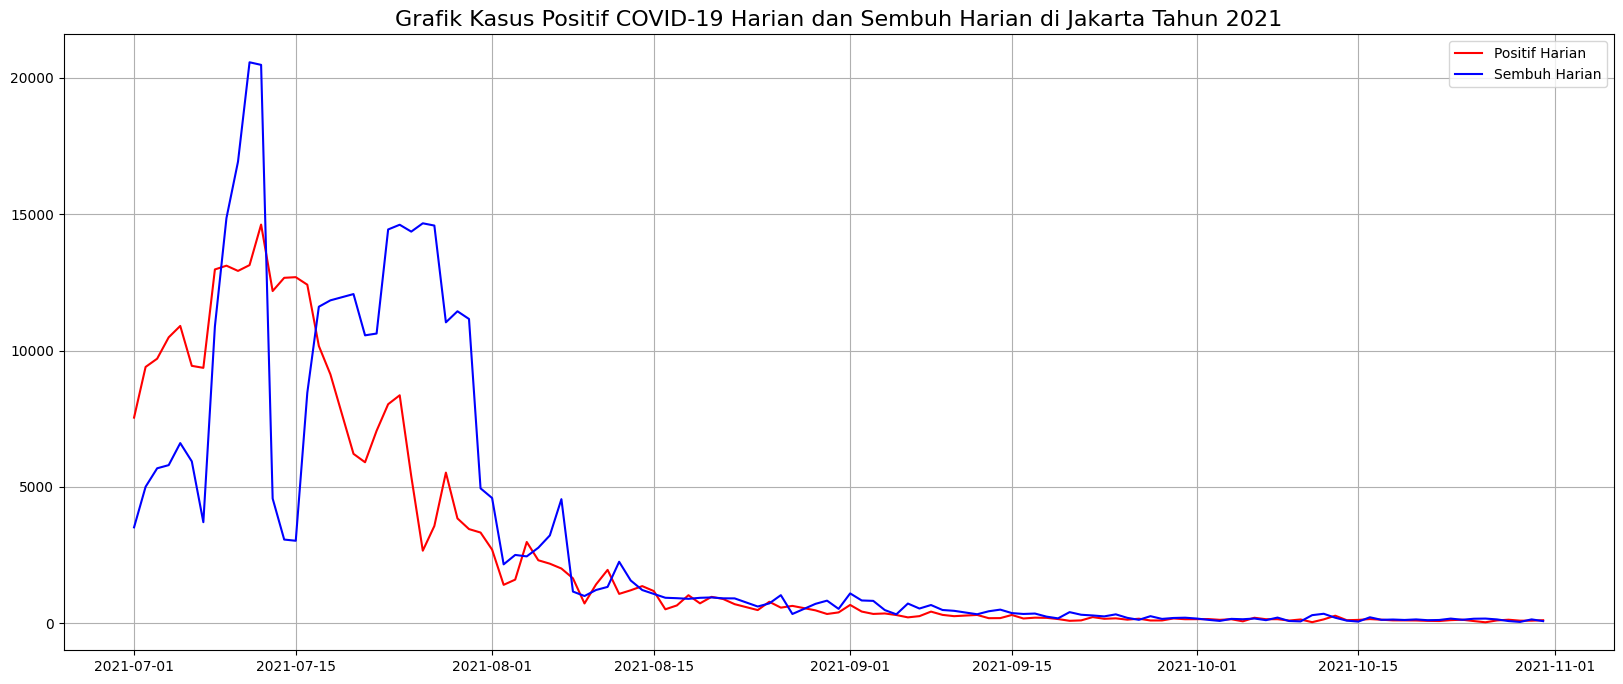

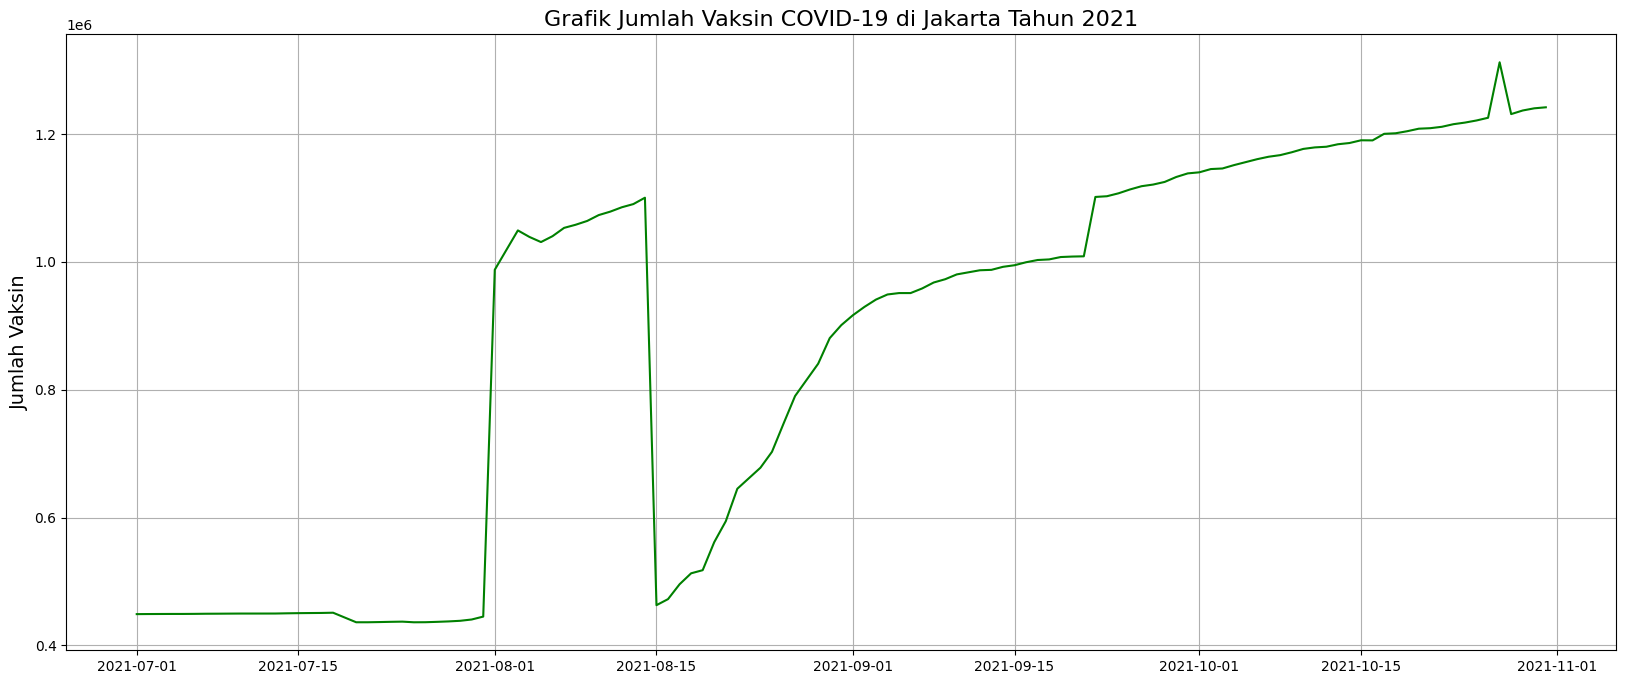

In [209]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(20, 8))
x.plot(df_covid_2021['tanggal'], df_covid_2021['Positif Harian'], 'r', label='Positif Harian')
x.plot(df_covid_2021['tanggal'], df_covid_2021['Sembuh Harian'], 'b', label='Sembuh Harian')
plt.title('Grafik Kasus Positif COVID-19 Harian dan Sembuh Harian di Jakarta Tahun 2021', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(20,8))
x.plot(df_vaksin['Tanggal'], df_vaksin['jumlah_vaksin'], 'g')
plt.title('Grafik Jumlah Vaksin COVID-19 di Jakarta Tahun 2021', fontsize=16)
plt.ylabel('Jumlah Vaksin', fontsize=14)
plt.grid(True)
plt.show()

**Korelasi antara Positif Harian dengan Jumlah Vaksin Di Jakarta Tahun 2021**

In [210]:
r1 = stats.spearmanr(df_covid_2021['Positif Harian'], df_vaksin['jumlah_vaksin'])
print("Korelasi Antara Jumlah Vaksin COVID-19 dengan Kasus Positif Harian COVID-19 Di Jakarta = ", r1[0])

r2 = stats.spearmanr(df_covid_2021['Sembuh Harian'], df_vaksin['jumlah_vaksin'])
print("Korelasi Antara Jumlah Vaksin COVID-19 dengan Sembuh Harian COVID-19 Di Jakarta = ", r2[0])

Korelasi Antara Jumlah Vaksin COVID-19 dengan Kasus Positif Harian COVID-19 Di Jakarta =  -0.8513977145320778
Korelasi Antara Jumlah Vaksin COVID-19 dengan Sembuh Harian COVID-19 Di Jakarta =  -0.8711636999895283
